In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from src.metrics import *
from src.models import * 
from src.concept_vectors import *
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import seaborn as sns
from ete3 import Tree
from collections import defaultdict
from src.hierarchy import *
import json 

## Impact of Distance (Zhang Sha Sha)

In [20]:
similarities = {
    'cosine': [],
    'euclidean': [],
}

In [21]:
for metric in ['euclidean','cosine']:
    for name in ['label','shapley','cem','concept2vec']:
        for name_2 in ['label','shapley','cem','concept2vec']:
            if name > name_2:
                h1 = hierarchy_object_by_metric[metric][name]
                h2 = hierarchy_object_by_metric[metric][name_2]

                our_distance = [embedding_distance(hierarchy_by_metric[metric][name][seed],hierarchy_by_metric[metric][name_2][seed],k=3) for seed in [43,44,45]]
                our_distance = (np.mean(our_distance),np.std(our_distance))

                zss_distance = [h1[seed].distance(h2[seed]) for seed in [43,44,45]]
                zss_distance = (np.mean(zss_distance),np.std(zss_distance))

                similarities[metric].append((our_distance[0],zss_distance[0]))

In [23]:
json.dump(similarities, open('results/extra_evaluation/similarity_to_zhang.json','w'))

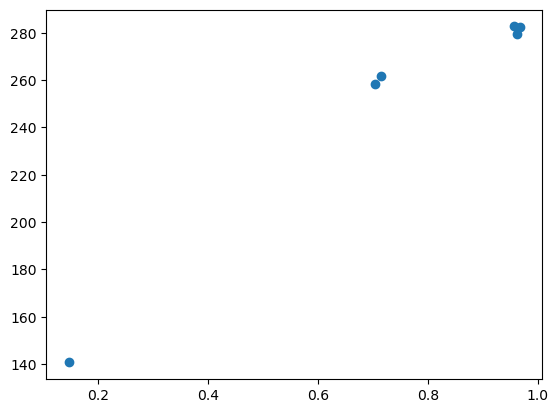

In [24]:
plt.scatter([i[0] for i in similarities['cosine']],[i[1] for i in similarities['cosine']])

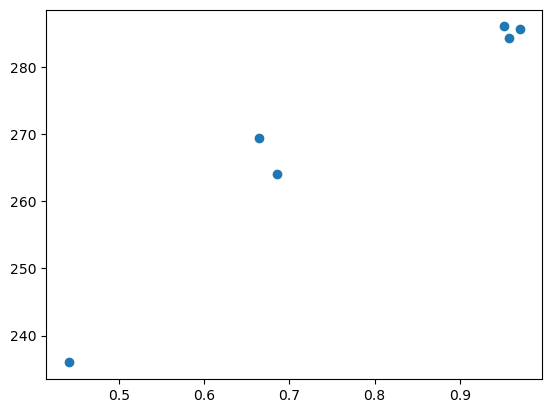

In [25]:
plt.scatter([i[0] for i in similarities['euclidean']],[i[1] for i in similarities['euclidean']])

## Impact of Ward vs. Max vs. Min

In [26]:
h1 = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43) 
h2 = create_hierarchy(create_min_hierarchy,load_label_vectors_simple,dataset,'',attributes,43) 
h3 = create_hierarchy(create_max_hierarchy,load_label_vectors_simple,dataset,'',attributes,43) 

In [27]:
print(h1)

                     ---- has_throat_color::white
                ----|
                          ---- has_breast_color::white
                     ----|
                               ---- has_underparts_color::white
                          ----|
                               ---- has_belly_color::white



           ----|
                               ---- has_upper_tail_color::grey
                          ----|
                               ---- has_under_tail_color::grey

                     ----|
                               ---- has_wing_color::grey
                          ----|
                                    ---- has_primary_color::grey
                               ----|
                                         ---- has_upperparts_color::grey
                                    ----|
                                         ---- has_back_color::grey




                ----|
                          ---- has_bill_length::about_the_same_as_head
               

In [28]:
print(h2)

      ---- has_wing_shape::rounded-wings
 ----|
           ---- has_bill_color::black
      ----|
                     ---- has_size::small_(5_-_9_in)
                ----|
                          ---- has_bill_length::shorter_than_head
                     ----|
                          ---- has_shape::perching-like


           ----|
                     ---- has_bill_shape::all-purpose
                ----|
                               ---- has_back_pattern::solid
                          ----|
                                         ---- has_leg_color::black
                                    ----|
                                              ---- has_leg_color::grey
                                         ----|
                                                   ---- has_tail_shape::notched_tail
                                              ----|
                                                        ---- has_bill_length::about_the_same_as_head
                          

In [29]:
print(h3)

                ---- has_eye_color::black
           ----|
                     ---- has_breast_pattern::solid
                ----|
                     ---- has_belly_pattern::solid


      ----|
                ---- has_wing_shape::rounded-wings
           ----|
                     ---- has_bill_shape::all-purpose
                ----|
                          ---- has_size::small_(5_-_9_in)
                     ----|
                               ---- has_bill_length::shorter_than_head
                          ----|
                               ---- has_shape::perching-like





 ----|
                     ---- has_back_pattern::solid
                ----|
                          ---- has_tail_pattern::solid
                     ----|
                          ---- has_wing_pattern::solid


           ----|
                                    ---- has_wing_color::black
                               ----|
                                    ---- has_upperparts_color::black


In [30]:
h1 = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,MNIST_Dataset(),'',MNIST_Dataset().get_attributes(),43) 
h2 = create_hierarchy(create_min_hierarchy,load_label_vectors_simple,MNIST_Dataset(),'',MNIST_Dataset().get_attributes(),43) 
h3 = create_hierarchy(create_max_hierarchy,load_label_vectors_simple,MNIST_Dataset(),'',MNIST_Dataset().get_attributes(),43) 

In [31]:
print(h1)

      ---- spurious
 ----|
                ---- 1_color
           ----|
                ---- 1_number

      ----|
                     ---- 7_color
                ----|
                     ---- 7_number

           ----|
                          ---- 3_color
                     ----|
                          ---- 3_number

                ----|
                               ---- 2_color
                          ----|
                               ---- 2_number

                     ----|
                                    ---- 9_color
                               ----|
                                    ---- 9_number

                          ----|
                                         ---- 0_color
                                    ----|
                                         ---- 0_number

                               ----|
                                              ---- 6_color
                                         ----|
                                 

In [32]:
print(h2)

      ---- spurious
 ----|
                ---- 1_color
           ----|
                ---- 1_number

      ----|
                     ---- 7_color
                ----|
                     ---- 7_number

           ----|
                          ---- 3_color
                     ----|
                          ---- 3_number

                ----|
                               ---- 2_color
                          ----|
                               ---- 2_number

                     ----|
                                    ---- 9_color
                               ----|
                                    ---- 9_number

                          ----|
                                         ---- 0_color
                                    ----|
                                         ---- 0_number

                               ----|
                                              ---- 6_color
                                         ----|
                                 

In [33]:
print(h3)

      ---- spurious
 ----|
                ---- 1_color
           ----|
                ---- 1_number

      ----|
                     ---- 7_color
                ----|
                     ---- 7_number

           ----|
                          ---- 3_color
                     ----|
                          ---- 3_number

                ----|
                               ---- 2_color
                          ----|
                               ---- 2_number

                     ----|
                                    ---- 9_color
                               ----|
                                    ---- 9_number

                          ----|
                                         ---- 0_color
                                    ----|
                                         ---- 0_number

                               ----|
                                              ---- 6_color
                                         ----|
                                 

More Analysis in Baseline Hierarchies